In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [61]:
df = pd.read_csv("cities_r2.csv")
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [62]:
df.dtypes

name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                           object
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [63]:
def dendrogram(df):
    sch.dendrogram(sch.linkage(df,method="ward"))
    plt.title("Dendrogram")
    plt.xlabel("")
    plt.ylabel("")

In [64]:
def Trainer(n,df):
    hc = AgglomerativeClustering(n_clusters=n,affinity="euclidean",linkage="ward")
    labels = hc.fit_predict(df)
    return(hc,labels)
    

In [65]:
X = df.iloc[:,[13,15]].values

In [66]:
def determineNoClusters(df):
    silh = []
    for i in range(2,11):
        model = AgglomerativeClustering(n_clusters=i)
        labels = model.fit_predict(df)
        score = silhouette_score(df,labels,metric="euclidean")
        silh.append(score)
    plt.bar(range(2,11),silh)

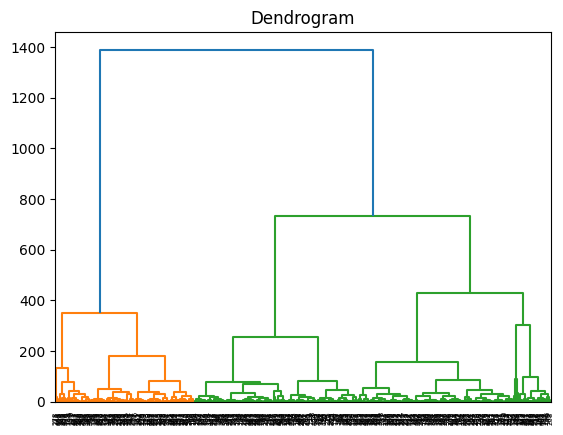

In [67]:
dendrogram(X)

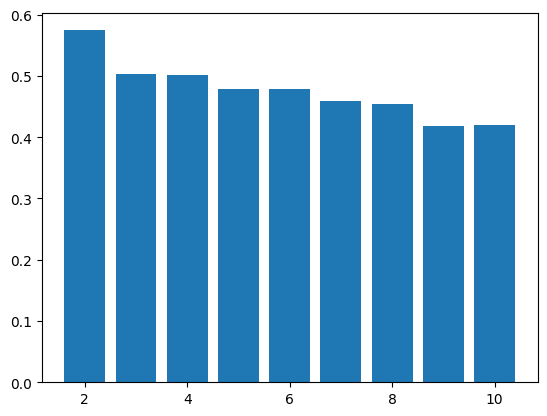

In [68]:
determineNoClusters(X)

In [69]:
hc , hc_labels = Trainer(3,X)

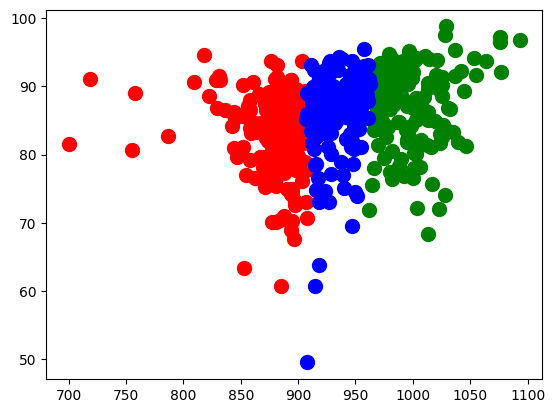

In [70]:
plt.scatter(X[hc_labels==0,0],X[hc_labels==0,1],s=100,color="red",label="Cluster 1")
plt.scatter(X[hc_labels==1,0],X[hc_labels==1,1],s=100,color="green",label="Cluster 2")
plt.scatter(X[hc_labels==2,0],X[hc_labels==2,1],s=100,color="blue",label="Cluster 3")
plt.show()